# 순환 신경망

케라스로 rnn 구현하기

In [5]:
from keras.models import Sequential
from keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))
# model.add(SimpleRNN(3, input_length=2, input_dim=10))와 동일
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 3)                 42        
                                                                 
Total params: 42 (168.00 Byte)
Trainable params: 42 (168.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10), return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (8, 2, 3)                 42        
                                                                 
Total params: 42 (168.00 Byte)
Trainable params: 42 (168.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


파이썬으로 rnn 구현하기

In [10]:
import numpy as np

timesteps = 10
input_dim = 4
hidden_units = 8

# 입력에 해당되는 2D 텐서
inputs = np.random.random((timesteps, input_dim))

# 초기 은닉 상태는 0(벡터)로 초기화
hidden_state_t = np.zeros((hidden_units,))

print('초기 은닉 상태 :',hidden_state_t)

초기 은닉 상태 : [0. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
# (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치
Wx = np.random.random((hidden_units, input_dim))
# (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치
Wh = np.random.random((hidden_units, hidden_units))
# (8,)크기의 1D 텐서 생성. 이 값은 편향(bias)
b = np.random.random((hidden_units,))

print('가중치 Wx의 크기(shape) :',np.shape(Wx))
print('가중치 Wh의 크기(shape) :',np.shape(Wh))
print('편향의 크기(shape) :',np.shape(b))

가중치 Wx의 크기(shape) : (8, 4)
가중치 Wh의 크기(shape) : (8, 8)
편향의 크기(shape) : (8,)


In [12]:
total_hidden_states = []

# 각 시점 별 입력값
for input_t in inputs:

  # Wx * Xt + Wh * Ht-1 + b(bias)
  output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b)

  # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep t, output_dim)
  # 각 시점의 은닉 상태의 값을 계속해서 누적
  total_hidden_states.append(list(output_t))
  hidden_state_t = output_t

# 출력 시 값을 깔끔하게 해주는 용도
total_hidden_states = np.stack(total_hidden_states, axis = 0)

# (timesteps, output_dim)
print('모든 시점의 은닉 상태 :')
print(total_hidden_states)

모든 시점의 은닉 상태 :
[[0.77462407 0.95509826 0.96042884 0.85256872 0.99085602 0.95271973
  0.98173185 0.95405677]
 [0.99997539 0.99995568 0.99998082 0.99999074 0.99999324 0.99998632
  0.99999271 0.99999043]
 [0.9999759  0.99995214 0.99996401 0.99999374 0.99995698 0.99991263
  0.99997259 0.99998456]
 [0.99997762 0.99995461 0.99997854 0.99999444 0.99998955 0.99997578
  0.9999901  0.99999319]
 [0.99996665 0.99990173 0.99997171 0.99999165 0.9999917  0.99997288
  0.99998964 0.9999942 ]
 [0.99998516 0.99998462 0.99999397 0.9999984  0.99999732 0.99999078
  0.99999557 0.99999751]
 [0.99998392 0.99997805 0.9999861  0.99999728 0.99999608 0.99998493
  0.99999169 0.99999495]
 [0.9999778  0.99996459 0.99998897 0.99999732 0.99999771 0.99998683
  0.99999355 0.99999715]
 [0.99997733 0.999945   0.9999627  0.99999297 0.99999398 0.99997644
  0.99998655 0.99999087]
 [0.99997377 0.99995469 0.99998698 0.99999684 0.99999497 0.99997578
  0.99999082 0.99999639]]


점검 퀴즈

In [1]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Embedding, Dense

vocab_size = 5000
embedding_dim = 100
hidden_size = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_size))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         500000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               29312     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 529441 (2.02 MB)
Trainable params: 529441 (2.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 케라스의 SimpleRNN과 LSTM 이해하기

**임의의 입력 생성**

In [13]:
import numpy as np
import tensorflow as tf
from keras.layers import SimpleRNN, LSTM, Bidirectional

# 임의의 입력 생성
train_X = [[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]
print(np.shape(train_X))

# 단어 벡터의 차원은 5
# 각 시점마다 5차원의 단어 벡터가 입력으로 사용됨
# 문장의 길이가 4
# = 4번의 시점(timesteps)이 존재

(4, 5)


RNN은 2D 텐서가 아니라 3D 텐서를 입력을 받음

-> 배치 크기 1을 추가해주기


In [14]:
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5, 2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape)

(1, 4, 5)


**SimpleRNN 이해하기**

In [15]:
rnn = SimpleRNN(3)
# rnn = SimpleRNN(3, return_sequences=False, return_state=False)와 동일
# return_sequences가 False : 마지막 시점의 은닉 상태만 출력
hidden_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
# (1, 3) 텐서 : 마지막 시점의 은닉 상태

hidden state : [[0.96543187 0.86557496 0.3948043 ]], shape: (1, 3)


In [16]:
rnn = SimpleRNN(3, return_sequences=True)
hidden_states = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
# (1, 4, 3) 크기의 텐서가 출력
# 입력 데이터는 (1, 4, 5)의 크기를 가지는 3D 텐서
# 4가 시점(timesteps)에 해당하는 값
# 모든 시점에 대해서 은닉 상태의 값을 출력하여 (1, 4, 3) 크기의 텐서를 출력

hidden states : [[[ 0.98571396  0.99987125 -0.93091774]
  [ 0.9256597   0.9995669  -0.97179705]
  [ 0.98234     0.9968591  -0.15468419]
  [ 0.4763849   0.99961865 -0.06523784]]], shape: (1, 4, 3)


In [17]:
# return_sequences가 True이면서, return_state도 True

rnn = SimpleRNN(3, return_sequences=True, return_state=True)
hidden_states, last_state = rnn(train_X)

# return_sequences=True로 인한 출력으로 모든 시점의 은닉 상태
print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
# return_state=True로 인한 출력으로 마지막 시점의 은닉 상태
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

hidden states : [[[ 0.27282393 -0.99085593  0.9999116 ]
  [ 0.9966035  -0.99450266  0.99977386]
  [ 0.7252435  -0.98867124  0.7976134 ]
  [ 0.650951   -0.43902475  0.9332727 ]]], shape: (1, 4, 3)
last hidden state : [[ 0.650951   -0.43902475  0.9332727 ]], shape: (1, 3)


In [18]:
# return_sequences는 False인데, retun_state가 True인 경우
rnn = SimpleRNN(3, return_sequences=False, return_state=True)
hidden_state, last_state = rnn(train_X)

# 마지막 시점의 은닉 상태를 출력
print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
# 마지막 시점의 은닉 상태를 출력
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

hidden state : [[-0.14727914  0.7841889   0.89722335]], shape: (1, 3)
last hidden state : [[-0.14727914  0.7841889   0.89722335]], shape: (1, 3)


**LSTM 이해하기**

임의의 입력에 대해서 LSTM을 사용할 경우

In [19]:
lstm = LSTM(3, return_sequences=False, return_state=True)
hidden_state, last_state, last_cell_state = lstm(train_X)

#  return_sequences가 False -> 마지막 시점의 은닉 상태
print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden state : [[0.7444666  0.2772802  0.08013996]], shape: (1, 3)
last hidden state : [[0.7444666  0.2772802  0.08013996]], shape: (1, 3)
last cell state : [[1.5542498  0.66304785 1.1264948 ]], shape: (1, 3)


In [20]:
lstm = LSTM(3, return_sequences=True, return_state=True)
hidden_states, last_hidden_state, last_cell_state = lstm(train_X)

# 모든 시점의 은닉 상태 출력
print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
# 마지막 은닉 상태 : 변함 없음
print('last hidden state : {}, shape: {}'.format(last_hidden_state, last_hidden_state.shape))
# 마지막 셀 상태 : 변함 없음
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.shape))

hidden states : [[[ 0.08351671  0.00886141  0.01109783]
  [ 0.10525063 -0.00084127  0.03062511]
  [ 0.12846053 -0.03663284  0.12857355]
  [ 0.14715955 -0.07278625 -0.05700773]]], shape: (1, 4, 3)
last hidden state : [[ 0.14715955 -0.07278625 -0.05700773]], shape: (1, 3)
last cell state : [[ 0.6150256  -0.4470731  -0.19786358]], shape: (1, 3)


**Bidirectional(LSTM) 이해하기**

In [21]:
# 출력되는 은닉 상태의 값 고정
k_init = tf.keras.initializers.Constant(value=0.1)
b_init = tf.keras.initializers.Constant(value=0)
r_init = tf.keras.initializers.Constant(value=0.1)

In [22]:
# return_sequences가 False이고, return_state가 True인 경우
bilstm = Bidirectional(LSTM(3, return_sequences=False, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[0.6303138 0.6303138 0.6303138 0.7038734 0.7038734 0.7038734]], shape: (1, 6)
forward state : [[0.6303138 0.6303138 0.6303138]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


정방향 LSTM의 마지막 시점의 은닉 상태값 : [0.6303139 0.6303139 0.6303139]

역방향 LSTM의 첫번째 시점의 은닉 상태값 : [0.70387346 0.70387346 0.70387346]

In [24]:
# return_sequences를 True
bilstm = Bidirectional(LSTM(3, return_sequences=True, return_state=True, \
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

# 모든 시점의 은닉 상태가 출력
print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

# 역방향 LSTM의 첫번째 시점의 은닉 상태
# 정방향 LSTM의 마지막 시점의 은닉 상태와 연결 X
# 정방향 LSTM의 첫번째 시점의 은닉 상태와 연결

hidden states : [[[0.35906473 0.35906473 0.35906473 0.7038734  0.7038734  0.7038734 ]
  [0.55111325 0.55111325 0.55111325 0.58863586 0.58863586 0.58863586]
  [0.59115744 0.59115744 0.59115744 0.3951699  0.3951699  0.3951699 ]
  [0.6303138  0.6303138  0.6303138  0.21942244 0.21942244 0.21942244]]], shape: (1, 4, 6)
forward state : [[0.6303138 0.6303138 0.6303138]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


# RNN을 이용한 텍스트 생성(Text Generation using RNN)

**RNN을 이용하여 텍스트 생성**

데이터에 대한 이해와 전처리

In [25]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

text = """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
# 패딩을 위한 0을 고려하여 +1
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 12


In [26]:
# 단어와 단어에 부여된 정수 인덱스 출력
print(tokenizer.word_index)

{'말이': 1, '경마장에': 2, '있는': 3, '뛰고': 4, '있다': 5, '그의': 6, '법이다': 7, '가는': 8, '고와야': 9, '오는': 10, '곱다': 11}


In [27]:
# 훈련 데이터 만들기
sequences = list()
for line in text.split('\n'): # 줄바꿈 문자를 기준으로 문장 토큰화
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

print('학습에 사용할 샘플의 개수: %d' % len(sequences))

학습에 사용할 샘플의 개수: 11


In [28]:
# 전체 샘플 출력
print(sequences)

[[2, 3], [2, 3, 1], [2, 3, 1, 4], [2, 3, 1, 4, 5], [6, 1], [6, 1, 7], [8, 1], [8, 1, 9], [8, 1, 9, 10], [8, 1, 9, 10, 1], [8, 1, 9, 10, 1, 11]]


In [29]:
# 전체 샘플에 대해서 길이 일치
# 모든 샘플에서 길이가 가장 긴 샘플의 길이 출력
max_len = max(len(l) for l in sequences)
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 6


In [30]:
# 전체 샘플의 길이를 6으로 패딩
# pad_sequences() : 모든 샘플에 대해서 0을 사용하여 길이를 맞추기
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

In [31]:
# 각 샘플의 마지막 단어를 레이블로 분리
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

In [32]:
print(X)

[[ 0  0  0  0  2]
 [ 0  0  0  2  3]
 [ 0  0  2  3  1]
 [ 0  2  3  1  4]
 [ 0  0  0  0  6]
 [ 0  0  0  6  1]
 [ 0  0  0  0  8]
 [ 0  0  0  8  1]
 [ 0  0  8  1  9]
 [ 0  8  1  9 10]
 [ 8  1  9 10  1]]


In [33]:
print(y)

[ 3  1  4  5  1  7  1  9 10  1 11]


In [34]:
# 레이블에 대해서 원-핫 인코딩을 수행
y = to_categorical(y, num_classes=vocab_size)

print(y)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


모델 설계

In [36]:
# RNN 모델에 데이터 훈련
from keras.models import Sequential
from keras.layers import Embedding, Dense, SimpleRNN

# 임베딩 벡터의 차원 : 10
embedding_dim = 10
# 은닉 상태의 크기 : 32
hidden_units = 32

# 다 대 일 구조의 RNN
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
# 전결합층(Fully Connected Layer) -> 출력층
# 단어 집합 크기만큼의 뉴런을 배치
# 마지막 시점에서 모든 가능한 단어 중 하나의 단어를 예측 -> 다중 클래스 분류 문제
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 200 에포크를 수행
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
1/1 - 2s - loss: 2.5173 - accuracy: 0.0000e+00 - 2s/epoch - 2s/step
Epoch 2/200
1/1 - 0s - loss: 2.5042 - accuracy: 0.0000e+00 - 9ms/epoch - 9ms/step
Epoch 3/200
1/1 - 0s - loss: 2.4916 - accuracy: 0.0000e+00 - 9ms/epoch - 9ms/step
Epoch 4/200
1/1 - 0s - loss: 2.4794 - accuracy: 0.0000e+00 - 10ms/epoch - 10ms/step
Epoch 5/200
1/1 - 0s - loss: 2.4675 - accuracy: 0.0000e+00 - 11ms/epoch - 11ms/step
Epoch 6/200
1/1 - 0s - loss: 2.4558 - accuracy: 0.1818 - 11ms/epoch - 11ms/step
Epoch 7/200
1/1 - 0s - loss: 2.4441 - accuracy: 0.1818 - 10ms/epoch - 10ms/step
Epoch 8/200
1/1 - 0s - loss: 2.4323 - accuracy: 0.2727 - 8ms/epoch - 8ms/step
Epoch 9/200
1/1 - 0s - loss: 2.4204 - accuracy: 0.3636 - 11ms/epoch - 11ms/step
Epoch 10/200
1/1 - 0s - loss: 2.4081 - accuracy: 0.3636 - 11ms/epoch - 11ms/step
Epoch 11/200
1/1 - 0s - loss: 2.3955 - accuracy: 0.3636 - 11ms/epoch - 11ms/step
Epoch 12/200
1/1 - 0s - loss: 2.3824 - accuracy: 0.3636 - 11ms/epoch - 11ms/step
Epoch 13/200
1/1 - 0s - los

In [37]:
# 입력된 단어로부터 다음 단어를 예측해서 문장을 생성하는 함수
# # 모델, 토크나이저, 현재 단어, 반복할 횟수
def sentence_generation(model, tokenizer, current_word, n):
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        # 현재 단어에 대한 정수 인코딩과 패딩
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items():
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면 break
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [38]:
print(sentence_generation(model, tokenizer, '경마장에', 4))

경마장에 있는 말이 뛰고 있다


In [39]:
print(sentence_generation(model, tokenizer, '그의', 2))

그의 말이 법이다


In [40]:
print(sentence_generation(model, tokenizer, '가는', 5))

가는 말이 고와야 오는 말이 곱다


**LSTM을 이용하여 텍스트 생성하기**

데이터에 대한 이해와 전처리

In [41]:
import pandas as pd
import numpy as np
from string import punctuation

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GDSC/AI ML study/ArticlesApril2018.csv')
df.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Toronto’s Ri...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


In [42]:
headline = []
# headline 열에서 모든 신문 기사의 제목을 뽑아서 하나의 리스트로 저장
headline.extend(list(df.headline.values))
headline[:5]

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown']

In [43]:
# 노이즈 데이터 제거
print('총 샘플의 개수 : {}'.format(len(headline)))

headline = [word for word in headline if word != "Unknown"]
print('노이즈값 제거 후 샘플의 개수 : {}'.format(len(headline)))

총 샘플의 개수 : 1324
노이즈값 제거 후 샘플의 개수 : 1214


In [44]:
headline[:5]

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?']

In [45]:
# 구두점 제거와 단어의 소문자화
def repreprocessing(raw_sentence):
    preproceseed_sentence = raw_sentence.encode("utf8").decode("ascii",'ignore')
    # 구두점 제거와 동시에 소문자화
    return ''.join(word for word in preproceseed_sentence if word not in punctuation).lower()

preprocessed_headline = [repreprocessing(x) for x in headline]
preprocessed_headline[:5]

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']

In [46]:
# 단어 집합(vocabulary)을 만들고 크기 확인
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_headline)
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 3494


In [47]:
# 3,494개의 단어가 존재
# 정수 인코딩을 진행
# 하나의 문장을 여러 줄로 분해
sequences = list()

for sentence in preprocessed_headline:

    # 각 샘플에 대한 정수 인코딩
    encoded = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

sequences[:11]

[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3]]

[[99, 269], # former nfl

 [99, 269, 371], # former nfl cheerleaders

 [99, 269, 371, 1115], # former nfl cheerleaders settlement

 [99, 269, 371, 1115, 582], # former nfl cheerleaders settlement offer

 [99, 269, 371, 1115, 582, 52], # 'former nfl cheerleaders settlement offer 1

 [99, 269, 371, 1115, 582, 52, 7], # former nfl cheerleaders settlement offer 1 and

 [99, 269, 371, 1115, 582, 52, 7, 2], # ... 이하 생략 ...

 [99, 269, 371, 1115, 582, 52, 7, 2, 372],

 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],

 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116], # 모든 단어가 사용된 완전한 첫번째 문장

바로 위의 줄은 : former nfl cheerleaders settlement offer 1 and a meeting with goodell

 [100, 3]] # epa to에 해당되며 두번째 문장이 시작됨.

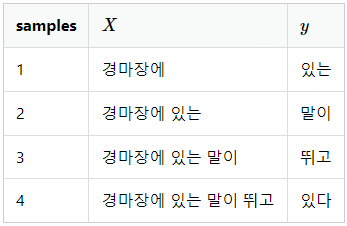

= 각 단어가 각 시점(time step)마다 하나씩 추가적으로 등장하는 형태

예측할 단어에 해당되는 레이블을 분리하는 작업 X

In [48]:
# 어떤 정수가 어떤 단어를 의미하는지 알아보기
# 인덱스로부터 단어를 찾는 index_to_word 만들기
index_to_word = {}
for key, value in tokenizer.word_index.items(): # 인덱스를 단어로 바꾸기 위해 index_to_word를 생성
    index_to_word[value] = key

print('빈도수 상위 582번 단어 : {}'.format(index_to_word[582]))

빈도수 상위 582번 단어 : offer


In [49]:
# 전체 샘플의 길이를 동일하게 만드는 패딩 작업을 수행
max_len = max(len(l) for l in sequences)
print('샘플의 최대 길이 : {}'.format(max_len))

# 가장 긴 샘플의 길이인 24로 모든 샘플의 길이를 패딩
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print(sequences[:3])

샘플의 최대 길이 : 24
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   99  269]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   99  269  371]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   99  269  371 1115]]


In [51]:
# 맨 우측 단어만 레이블로 분리
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

print(X[:3])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0  99]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0  99 269]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  99 269 371]]


In [52]:
print(y[:3])

[ 269  371 1115]


In [54]:
# 레이블 데이터 y에 대해서 원-핫 인코딩을 수행
y = to_categorical(y, num_classes=vocab_size)

-> 기존 훈련 데이터에서 맨 우측에 있던 정수들이 별도로 저장됨

모델 설계

In [55]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM

# 임베딩 벡터의 차원은 10
embedding_dim = 10
# 은닉 상태의 크기는 128
hidden_units = 128

# 다 대 일 구조의 LSTM
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
# 전결합층(Fully Connected Layer) -> 출력층
# 단어 집합 크기만큼의 뉴런을 배치
# 마지막 시점에서 모든 가능한 단어 중 하나의 단어를 예측 -> 다중 클래스 분류 문제
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
244/244 - 16s - loss: 7.6395 - accuracy: 0.0279 - 16s/epoch - 66ms/step
Epoch 2/200
244/244 - 13s - loss: 7.1144 - accuracy: 0.0288 - 13s/epoch - 55ms/step
Epoch 3/200
244/244 - 12s - loss: 6.9761 - accuracy: 0.0361 - 12s/epoch - 50ms/step
Epoch 4/200
244/244 - 14s - loss: 6.8444 - accuracy: 0.0405 - 14s/epoch - 58ms/step
Epoch 5/200
244/244 - 11s - loss: 6.6867 - accuracy: 0.0452 - 11s/epoch - 46ms/step
Epoch 6/200
244/244 - 11s - loss: 6.5262 - accuracy: 0.0511 - 11s/epoch - 47ms/step
Epoch 7/200
244/244 - 11s - loss: 6.3414 - accuracy: 0.0523 - 11s/epoch - 46ms/step
Epoch 8/200
244/244 - 9s - loss: 6.1469 - accuracy: 0.0564 - 9s/epoch - 37ms/step
Epoch 9/200
244/244 - 11s - loss: 5.9661 - accuracy: 0.0627 - 11s/epoch - 46ms/step
Epoch 10/200
244/244 - 13s - loss: 5.7897 - accuracy: 0.0632 - 13s/epoch - 52ms/step
Epoch 11/200
244/244 - 11s - loss: 5.6195 - accuracy: 0.0684 - 11s/epoch - 47ms/step
Epoch 12/200
244/244 - 12s - loss: 5.4492 - accuracy: 0.0751 - 12s/epoch - 4

In [56]:
# 문장을 생성하는 함수
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre')

        # 입력한 X(현재 단어)에 대해서 y를 예측하고 y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items():
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [57]:
print(sentence_generation(model, tokenizer, 'i', 10))

i cant jump ship from facebook yet them of syria slippery


In [58]:
print(sentence_generation(model, tokenizer, 'how', 10))

how to make a crossword puzzle come to the furor koreas


# 문자 단위 RNN(Char RNN)

**문자 단위 RNN 언어 모델(Char RNNLM)**

데이터에 대한 이해와 전처리

In [59]:
import numpy as np
import urllib.request
from keras.utils import to_categorical

# 데이터 로드
urllib.request.urlretrieve("http://www.gutenberg.org/files/11/11-0.txt", filename="11-0.txt")

f = open('11-0.txt', 'rb')
sentences = []
for sentence in f: # 데이터로부터 한 줄씩 읽기
    sentence = sentence.strip() # strip()을 통해 \r, \n을 제거
    sentence = sentence.lower() # 소문자화
    sentence = sentence.decode('ascii', 'ignore') # \xe2\x80\x99 등과 같은 바이트 열 제거
    if len(sentence) > 0:
        sentences.append(sentence)
f.close()

In [60]:
sentences[:5]

['the project gutenberg ebook of alices adventures in wonderland, by lewis carroll',
 'this ebook is for the use of anyone anywhere in the united states and',
 'most other parts of the world at no cost and with almost no restrictions',
 'whatsoever. you may copy it, give it away or re-use it under the terms',
 'of the project gutenberg license included with this ebook or online at']

In [61]:
# 하나의 문자열로 통합
total_data = ' '.join(sentences)
print('문자열의 길이 또는 총 문자의 개수: %d' % len(total_data))

문자열의 길이 또는 총 문자의 개수: 159484


In [62]:
# 문자 집합을 만들기
char_vocab = sorted(list(set(total_data)))
vocab_size = len(char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size))

문자 집합의 크기 : 56


In [63]:
# 문자에 고유한 정수 부여
char_to_index = dict((char, index) for index, char in enumerate(char_vocab))
print('문자 집합 :',char_to_index)

문자 집합 : {' ': 0, '!': 1, '"': 2, '#': 3, '$': 4, '%': 5, "'": 6, '(': 7, ')': 8, '*': 9, ',': 10, '-': 11, '.': 12, '/': 13, '0': 14, '1': 15, '2': 16, '3': 17, '4': 18, '5': 19, '6': 20, '7': 21, '8': 22, '9': 23, ':': 24, ';': 25, '?': 26, '[': 27, ']': 28, '_': 29, 'a': 30, 'b': 31, 'c': 32, 'd': 33, 'e': 34, 'f': 35, 'g': 36, 'h': 37, 'i': 38, 'j': 39, 'k': 40, 'l': 41, 'm': 42, 'n': 43, 'o': 44, 'p': 45, 'q': 46, 'r': 47, 's': 48, 't': 49, 'u': 50, 'v': 51, 'w': 52, 'x': 53, 'y': 54, 'z': 55}


In [64]:
# 정수로부터 문자 리턴
index_to_char = {}
for key, value in char_to_index.items():
    index_to_char[value] = key

In [65]:
# 훈련 데이터 구성
# appl (입력 시퀀스) -> pple (예측해야하는 시퀀스)
train_X = 'appl'
train_y = 'pple'

In [66]:
# 문장 샘플의 길이 정하기
# 길이만큼 문자열 전체를 등분

seq_length = 60

# 문자열의 길이를 seq_length로 나누면 전처리 후 생겨날 샘플 수
n_samples = int(np.floor((len(total_data) - 1) / seq_length))
print ('샘플의 수 : {}'.format(n_samples))

샘플의 수 : 2658


In [67]:
# 총 샘플의 수 2,658개
# 전처리 진행
train_X = []
train_y = []

for i in range(n_samples):
    # 0:60 -> 60:120 -> 120:180로 loop를 돌면서 문장 샘플을 1개씩 pick.
    X_sample = total_data[i * seq_length: (i + 1) * seq_length]

    # 정수 인코딩
    X_encoded = [char_to_index[c] for c in X_sample]
    train_X.append(X_encoded)

    # 오른쪽으로 1칸 쉬프트
    y_sample = total_data[i * seq_length + 1: (i + 1) * seq_length + 1]
    y_encoded = [char_to_index[c] for c in y_sample]
    train_y.append(y_encoded)

print('X 데이터의 첫번째 샘플 :',train_X[0])
print('y 데이터의 첫번째 샘플 :',train_y[0])
print('-'*50)
print('X 데이터의 첫번째 샘플 디코딩 :',[index_to_char[i] for i in train_X[0]])
print('y 데이터의 첫번째 샘플 디코딩 :',[index_to_char[i] for i in train_y[0]])

# train_y[0]은 train_X[0]에서 오른쪽으로 한 칸 쉬프트 된 문장

X 데이터의 첫번째 샘플 : [49, 37, 34, 0, 45, 47, 44, 39, 34, 32, 49, 0, 36, 50, 49, 34, 43, 31, 34, 47, 36, 0, 34, 31, 44, 44, 40, 0, 44, 35, 0, 30, 41, 38, 32, 34, 48, 0, 30, 33, 51, 34, 43, 49, 50, 47, 34, 48, 0, 38, 43, 0, 52, 44, 43, 33, 34, 47, 41, 30]
y 데이터의 첫번째 샘플 : [37, 34, 0, 45, 47, 44, 39, 34, 32, 49, 0, 36, 50, 49, 34, 43, 31, 34, 47, 36, 0, 34, 31, 44, 44, 40, 0, 44, 35, 0, 30, 41, 38, 32, 34, 48, 0, 30, 33, 51, 34, 43, 49, 50, 47, 34, 48, 0, 38, 43, 0, 52, 44, 43, 33, 34, 47, 41, 30, 43]
--------------------------------------------------
X 데이터의 첫번째 샘플 디코딩 : ['t', 'h', 'e', ' ', 'p', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'g', 'u', 't', 'e', 'n', 'b', 'e', 'r', 'g', ' ', 'e', 'b', 'o', 'o', 'k', ' ', 'o', 'f', ' ', 'a', 'l', 'i', 'c', 'e', 's', ' ', 'a', 'd', 'v', 'e', 'n', 't', 'u', 'r', 'e', 's', ' ', 'i', 'n', ' ', 'w', 'o', 'n', 'd', 'e', 'r', 'l', 'a']
y 데이터의 첫번째 샘플 디코딩 : ['h', 'e', ' ', 'p', 'r', 'o', 'j', 'e', 'c', 't', ' ', 'g', 'u', 't', 'e', 'n', 'b', 'e', 'r', 'g', ' ', 'e',

In [68]:
print(train_X[1])
print("---------------------------------------------------------------")
print(train_y[1])

# train_y[1]은 train_X[1]에서 오른쪽으로 한 칸 쉬프트 된 문장

[43, 33, 10, 0, 31, 54, 0, 41, 34, 52, 38, 48, 0, 32, 30, 47, 47, 44, 41, 41, 0, 49, 37, 38, 48, 0, 34, 31, 44, 44, 40, 0, 38, 48, 0, 35, 44, 47, 0, 49, 37, 34, 0, 50, 48, 34, 0, 44, 35, 0, 30, 43, 54, 44, 43, 34, 0, 30, 43, 54]
---------------------------------------------------------------
[33, 10, 0, 31, 54, 0, 41, 34, 52, 38, 48, 0, 32, 30, 47, 47, 44, 41, 41, 0, 49, 37, 38, 48, 0, 34, 31, 44, 44, 40, 0, 38, 48, 0, 35, 44, 47, 0, 49, 37, 34, 0, 50, 48, 34, 0, 44, 35, 0, 30, 43, 54, 44, 43, 34, 0, 30, 43, 54, 52]


In [69]:
# train_X와 train_y에 대해서 원-핫 인코딩 수행
# 문자 단위 RNN -> 입력 시퀀스에 대해서 워드 임베딩을 하지 않음
# 임베딩층 사용 X -> 입력 시퀀스인 train_X에 대해서도 원-핫 인코딩 수행

train_X = to_categorical(train_X)
train_y = to_categorical(train_y)

print('train_X의 크기(shape) : {}'.format(train_X.shape)) # 원-핫 인코딩
print('train_y의 크기(shape) : {}'.format(train_y.shape)) # 원-핫 인코딩

train_X의 크기(shape) : (2658, 60, 56)
train_y의 크기(shape) : (2658, 60, 56)


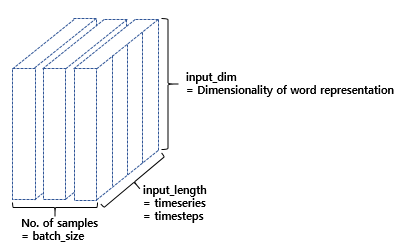

샘플의 수(No. of samples)가 2,658개, 입력 시퀀스의 길이(input_length)가 60, 각 벡터의 차원(input_dim)이 55

`모델 설계`

In [70]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, TimeDistributed

# 은닉 상태의 크기는 256
hidden_units = 256

# 다 대 다 구조의 LSTM
model = Sequential()
# 은닉층 두 개
model.add(LSTM(hidden_units, input_shape=(None, train_X.shape[2]), return_sequences=True))
model.add(LSTM(hidden_units, return_sequences=True))
# 전결합층(Fully Connected Layer)을 출력층으로 문자 집합 크기만큼의 뉴런을 배치
# 모든 시점에서 모든 가능한 문자 중 하나의 문자를 예측하는 다중 클래스 분류 문제
model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 80 에포크를 수행
model.fit(train_X, train_y, epochs=80, verbose=2)

Epoch 1/80
84/84 - 47s - loss: 3.0627 - accuracy: 0.1852 - 47s/epoch - 562ms/step
Epoch 2/80
84/84 - 44s - loss: 2.7645 - accuracy: 0.2395 - 44s/epoch - 519ms/step
Epoch 3/80
84/84 - 43s - loss: 2.4360 - accuracy: 0.3183 - 43s/epoch - 509ms/step
Epoch 4/80
84/84 - 44s - loss: 2.3095 - accuracy: 0.3435 - 44s/epoch - 526ms/step
Epoch 5/80
84/84 - 43s - loss: 2.2210 - accuracy: 0.3676 - 43s/epoch - 509ms/step
Epoch 6/80
84/84 - 43s - loss: 2.1495 - accuracy: 0.3876 - 43s/epoch - 508ms/step
Epoch 7/80
84/84 - 43s - loss: 2.0888 - accuracy: 0.4018 - 43s/epoch - 511ms/step
Epoch 8/80
84/84 - 42s - loss: 2.0361 - accuracy: 0.4151 - 42s/epoch - 503ms/step
Epoch 9/80
84/84 - 41s - loss: 1.9908 - accuracy: 0.4254 - 41s/epoch - 493ms/step
Epoch 10/80
84/84 - 41s - loss: 1.9518 - accuracy: 0.4357 - 41s/epoch - 485ms/step
Epoch 11/80
84/84 - 42s - loss: 1.9185 - accuracy: 0.4442 - 42s/epoch - 499ms/step
Epoch 12/80
84/84 - 42s - loss: 1.8826 - accuracy: 0.4529 - 42s/epoch - 500ms/step
Epoch 13/80
8

In [71]:
# 특정 문자를 주면 다음 문자를 계속해서 생성
def sentence_generation(model, length):
    # 문자에 대한 랜덤한 정수 생성
    ix = [np.random.randint(vocab_size)]

    # 랜덤한 정수로부터 맵핑되는 문자 생성
    y_char = [index_to_char[ix[-1]]]
    print(ix[-1],'번 문자',y_char[-1],'로 예측을 시작!')

    # (1, length, 55) 크기의 X 생성. 즉, LSTM의 입력 시퀀스 생성
    X = np.zeros((1, length, vocab_size))

    for i in range(length):
        # X[0][i][예측한 문자의 인덱스] = 1, 즉, 예측 문자를 다음 입력 시퀀스에 추가
        X[0][i][ix[-1]] = 1
        print(index_to_char[ix[-1]], end="")
        ix = np.argmax(model.predict(X[:, :i+1, :])[0], 1)
        y_char.append(index_to_char[ix[-1]])
    return ('').join(y_char)

In [72]:
result = sentence_generation(model, 100)
print(result)

45 번 문자 p 로 예측을 시작!
1/1 [==============================] - 0s 55ms/step
per that say down at her added sighing as her. i drippice topes, you knowally, and she tried to say w


**문자 단위 RNN(Char RNN)으로 텍스트 생성하기**

데이터에 대한 이해와 전처리

In [73]:
import numpy as np
from keras.utils import to_categorical

# 엉터리 노래 가사
raw_text = '''
I get on with life as a programmer,
I like to contemplate beer.
But when I start to daydream,
My mind turns straight to wine.

Do I love wine more than beer?

I like to use words about beer.
But when I stop my talking,
My mind turns straight to wine.

I hate bugs and errors.
But I just think back to wine,
And I'm happy once again.

I like to hang out with programming and deep learning.
But when left alone,
My mind turns straight to wine.
'''

In [74]:
# 단락 구분을 없애고 하나의 문자열로 재저장
tokens = raw_text.split()
raw_text = ' '.join(tokens)
print(raw_text)

I get on with life as a programmer, I like to contemplate beer. But when I start to daydream, My mind turns straight to wine. Do I love wine more than beer? I like to use words about beer. But when I stop my talking, My mind turns straight to wine. I hate bugs and errors. But I just think back to wine, And I'm happy once again. I like to hang out with programming and deep learning. But when left alone, My mind turns straight to wine.


In [75]:
# 중복을 제거한 문자 집합 생성
char_vocab = sorted(list(set(raw_text)))
vocab_size = len(char_vocab)
print('문자 집합 :',char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size))

문자 집합 : [' ', "'", ',', '.', '?', 'A', 'B', 'D', 'I', 'M', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'y']
문자 집합의 크기 : 33


In [76]:
char_to_index = dict((char, index) for index, char in enumerate(char_vocab)) # 문자에 고유한 정수 인덱스 부여
print(char_to_index)

{' ': 0, "'": 1, ',': 2, '.': 3, '?': 4, 'A': 5, 'B': 6, 'D': 7, 'I': 8, 'M': 9, 'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15, 'g': 16, 'h': 17, 'i': 18, 'j': 19, 'k': 20, 'l': 21, 'm': 22, 'n': 23, 'o': 24, 'p': 25, 'r': 26, 's': 27, 't': 28, 'u': 29, 'v': 30, 'w': 31, 'y': 32}


In [77]:
# 입력 시퀀스의 길이가 10가 되도록 데이터를 구성
# 예측 대상인 문자도 필요 -> 길이 11
length = 11
sequences = []
for i in range(length, len(raw_text)):
    seq = raw_text[i-length:i] # 길이 11의 문자열을 지속적으로 만든다.
    sequences.append(seq)
print('총 훈련 샘플의 수: %d' % len(sequences))

총 훈련 샘플의 수: 426


In [78]:
# 샘플의 수는 426개
sequences[:10]

['I get on wi',
 ' get on wit',
 'get on with',
 'et on with ',
 't on with l',
 ' on with li',
 'on with lif',
 'n with life',
 ' with life ',
 'with life a']

In [79]:
# char_to_index를 사용하여 전체 데이터에 대해서 정수 인코딩을 수행
encoded_sequences = []
for sequence in sequences: # 전체 데이터에서 문장 샘플을 1개씩 꺼낸다.
    encoded_sequence = [char_to_index[char] for char in sequence] # 문장 샘플에서 각 문자에 대해서 정수 인코딩을 수행.
    encoded_sequences.append(encoded_sequence)

# 정수 인코딩 결과가 X에 저장
encoded_sequences[:5]

[[8, 0, 16, 14, 28, 0, 24, 23, 0, 31, 18],
 [0, 16, 14, 28, 0, 24, 23, 0, 31, 18, 28],
 [16, 14, 28, 0, 24, 23, 0, 31, 18, 28, 17],
 [14, 28, 0, 24, 23, 0, 31, 18, 28, 17, 0],
 [28, 0, 24, 23, 0, 31, 18, 28, 17, 0, 21]]

In [80]:
# 예측 대상 문자 분리
encoded_sequences = np.array(encoded_sequences)

# 맨 마지막 위치의 문자를 분리
X_data = encoded_sequences[:,:-1]
# 맨 마지막 위치의 문자를 저장
y_data = encoded_sequences[:,-1]

In [81]:
# 원-핫 인코딩
X_data_one_hot = [to_categorical(encoded, num_classes=vocab_size) for encoded in X_data]
X_data_one_hot = np.array(X_data_one_hot)
y_data_one_hot = to_categorical(y_data, num_classes=vocab_size)

print(X_data_one_hot.shape)

(426, 10, 33)


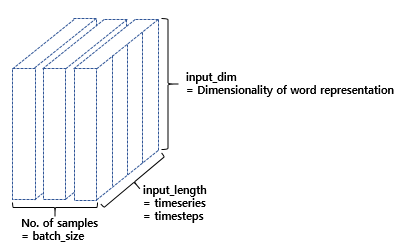

샘플의 수(No. of samples)가 426개, 입력 시퀀스의 길이(input_length)가 10, 각 벡터의 차원(input_dim)이 33

모델 설계

In [82]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.preprocessing.sequence import pad_sequences

# 은닉 상태의 크기는 64
hidden_units = 64

# 다 대 일 구조의 LSTM
model = Sequential()
model.add(LSTM(hidden_units, input_shape=(X_data_one_hot.shape[1], X_data_one_hot.shape[2])))
# 전결합층(Fully Connected Layer)을 출력층으로 문자 집합 크기만큼의 뉴런을 배치
# 마지막 시점에서 모든 가능한 문자 중 하나의 문자를 예측하는 다중 클래스 분류 문제
model.add(Dense(vocab_size, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 100 에포크를 수행
model.fit(X_data_one_hot, y_data_one_hot, epochs=100, verbose=2)

Epoch 1/100
14/14 - 3s - loss: 3.4749 - accuracy: 0.0986 - 3s/epoch - 194ms/step
Epoch 2/100
14/14 - 0s - loss: 3.3956 - accuracy: 0.1972 - 104ms/epoch - 7ms/step
Epoch 3/100
14/14 - 0s - loss: 3.1905 - accuracy: 0.1972 - 96ms/epoch - 7ms/step
Epoch 4/100
14/14 - 0s - loss: 3.0021 - accuracy: 0.1972 - 104ms/epoch - 7ms/step
Epoch 5/100
14/14 - 0s - loss: 2.9593 - accuracy: 0.1972 - 106ms/epoch - 8ms/step
Epoch 6/100
14/14 - 0s - loss: 2.9407 - accuracy: 0.1972 - 146ms/epoch - 10ms/step
Epoch 7/100
14/14 - 0s - loss: 2.9179 - accuracy: 0.1972 - 159ms/epoch - 11ms/step
Epoch 8/100
14/14 - 0s - loss: 2.9046 - accuracy: 0.1972 - 154ms/epoch - 11ms/step
Epoch 9/100
14/14 - 0s - loss: 2.8923 - accuracy: 0.1972 - 157ms/epoch - 11ms/step
Epoch 10/100
14/14 - 0s - loss: 2.8759 - accuracy: 0.1972 - 158ms/epoch - 11ms/step
Epoch 11/100
14/14 - 0s - loss: 2.8516 - accuracy: 0.1972 - 158ms/epoch - 11ms/step
Epoch 12/100
14/14 - 0s - loss: 2.8286 - accuracy: 0.1972 - 150ms/epoch - 11ms/step
Epoch 13

In [83]:
# 문장을 생성하는 함수
# 문자열을 입력하면, 해당 문자열로부터 다음 문자를 예측하는 것을 반복
def sentence_generation(model, char_to_index, seq_length, seed_text, n):

    # 초기 시퀀스
    init_text = seed_text
    sentence = ''

    # 다음 문자 예측은 총 n번만 반복.
    for _ in range(n):
        encoded = [char_to_index[char] for char in seed_text] # 현재 시퀀스에 대한 정수 인코딩
        encoded = pad_sequences([encoded], maxlen=seq_length, padding='pre') # 데이터에 대한 패딩
        encoded = to_categorical(encoded, num_classes=len(char_to_index))

        # 입력한 X(현재 시퀀스)에 대해서 y를 예측하고 y(예측한 문자)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for char, index in char_to_index.items():
            if index == result:
                break

        # 현재 시퀀스 + 예측 문자를 현재 시퀀스로 변경
        seed_text = seed_text + char

        # 예측 문자를 문장에 저장
        sentence = sentence + char

    # n번의 다음 문자 예측이 끝나면 최종 완성된 문장을 리턴.
    sentence = init_text + sentence
    return sentence

print(sentence_generation(model, char_to_index, 10, 'I get on w', 80))

I get on with life as a programmer, I like to use words about beer. But when I start to da
